<a href="https://colab.research.google.com/github/Philemonkipkirui/Data-Science/blob/main/Global_Suicide_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This is the review of world suicide rates between countries from the year 1985 to 2021**

The study is keen to look into variables such as sex, age , country populations and the distributionof suicide rates across them. Focus is also given to macro factors such as gross domestic product(for year and per capita) and how these factors may or may not influence suicide rates across  countries

In [1]:
from google.colab import drive

In [25]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Suicide rates.csv')
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers
5,Albania,1987,female,75+ years,1.0,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
6,Albania,1987,female,35-54 years,6.0,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
7,Albania,1987,female,25-34 years,4.0,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers
8,Albania,1987,male,55-74 years,1.0,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
9,Albania,1987,female,5-14 years,0.0,311000,0.00,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X


In [5]:
df.tail(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
31736,Romania,2017,female,75+ years,56.0,19588715,0.285879,Romania2017,0.814226,2.12E+11,10807.009170,G.I. Generation
31737,Russian Federation,2017,female,75+ years,798.0,144496739,0.552262,Russian Federation2017,0.832394,1.57E+12,10720.332660,G.I. Generation
31738,Saint Vincent and the Grenadines,2017,female,75+ years,0.0,15157793,0.000000,Saint Vincent and the Grenadines2017,0.760935,20996564752,1361.701972,G.I. Generation
31739,Serbia,2017,female,75+ years,0.0,7020858,0.000000,Serbia2017,0.791000,44179055280,6292.543629,G.I. Generation
31740,Seychelles,2017,female,75+ years,0.0,95843,0.000000,Seychelles2017,0.918620,1528242026,15945.264930,G.I. Generation
31741,Singapore,2017,female,75+ years,15.0,5612253,0.267272,Singapore2017,0.929767,3.43E+11,61176.456360,G.I. Generation
31742,Slovakia,2017,female,75+ years,2.0,40574,4.929265,Slovakia2017,0.850305,95157888667,17494.728790,G.I. Generation
31743,Slovenia,2017,female,75+ years,24.0,2066388,1.161447,Slovenia2017,0.907633,48469082710,23455.944730,G.I. Generation
31744,South Africa,2017,female,75+ years,1.0,56641209,0.001765,South Africa2017,0.709352,3.81E+11,6690.939847,G.I. Generation
31745,Spain,2017,female,75+ years,161.0,46593236,0.345544,Spain2017,0.888952,1.31E+12,28100.586240,G.I. Generation


**Data Cleaning**

In [28]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

In [30]:
#Renaming the gdp_for_year ($) and gdp_per_capita (
df.rename(columns = {' gdp_for_year ($)':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita', 'HDI for year':'HDI_FOR_YEAR'}, inplace = True)


In [40]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Relacing the null values in the suicide_no and HDI for year columns with zeros

In [45]:
df_cleaned= df.fillna(0)
df_cleaned

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,0.000000,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,0.000000,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,0.000000,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,0.000000,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,0.000000,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


# **EDA, Visualization and Insights**

In [46]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         31756 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        31756 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [47]:
df_cleaned.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,31756.000000,3.175600e+04,31756.000000,31756.000000,31756.000000
mean,2003.395390,228.175305,7.217454e+06,11.716668,0.307409,17588.954606
std,9.760604,852.598398,5.799323e+07,21.590926,0.391363,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.000000,251.000000
25%,1996.000000,2.000000,1.288210e+05,0.370000,0.000000,3765.000000
50%,2004.000000,22.000000,5.468325e+05,4.285000,0.000000,10062.000000
75%,2011.000000,123.000000,2.908763e+06,14.560000,0.758440,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


From the cleaned data , the year that had the highest number of suicides was 2020 with 22,338 cases recorded around the world

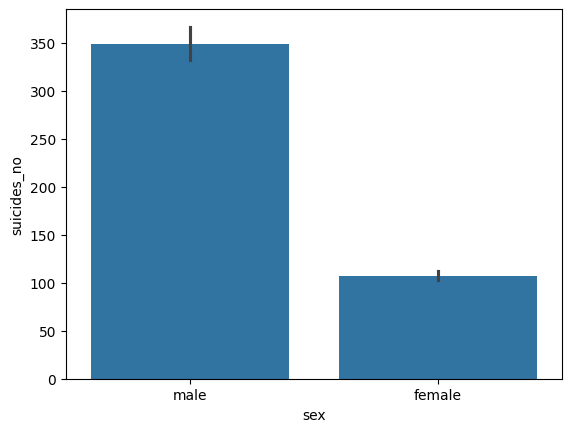

In [58]:
#Visualization of the relationship between gender and suicides
ax = sns.barplot(x = 'sex' ,  y ='suicides_no',  data = df_cleaned)
plt.show()

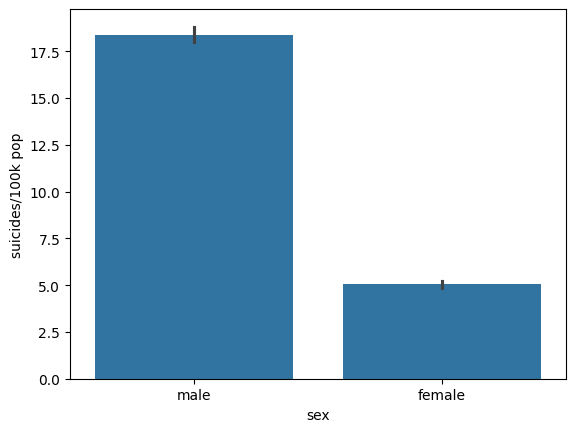

In [55]:
#Visualization of the relationship between gender and suicides per 100k
ax = sns.barplot(x = 'sex' ,  y ='suicides/100k pop',  data = df_cleaned)
plt.show()

Suicide is more prevalent among males than females alsom 3x as much.

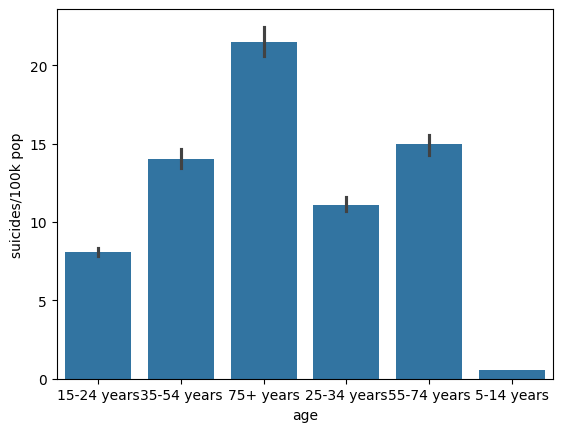

In [57]:
#Visualization of the relationship between age and suicides
ax = sns.barplot(x = 'age' ,  y ='suicides/100k pop',  data = df_cleaned)
plt.show()

Suicide is more common for individuals of ages between 75+ years and least between individuals of betweeen 5-14 years

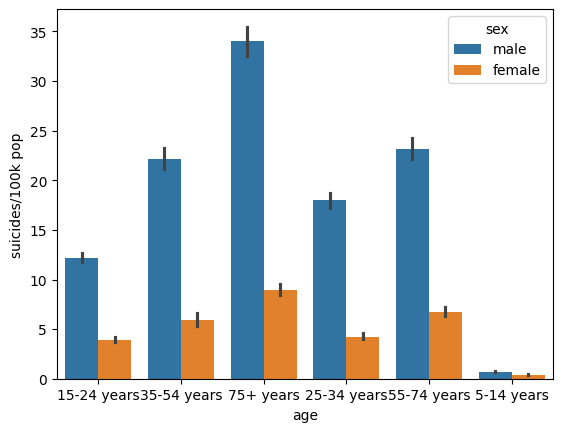

In [62]:
#A comparison of age, sex and suicides.
ax = sns.barplot(x='age', y = 'suicides/100k pop',  hue ='sex', data = df_cleaned)
plt.show()

**Visualization of the relationship betwen Generations and suicides.**

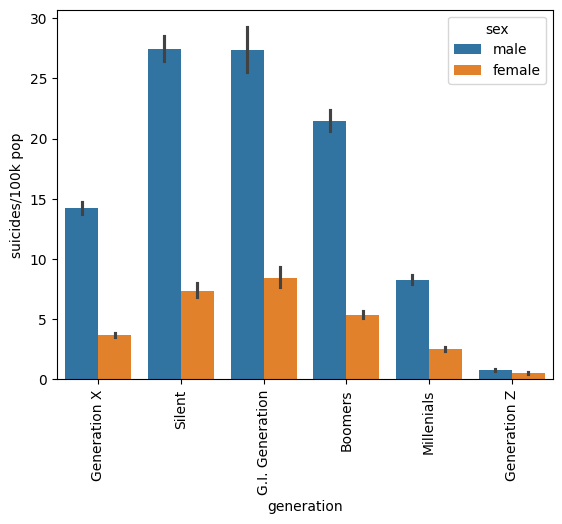

In [67]:

ax = sns.barplot(x = 'generation' ,  y ='suicides/100k pop', hue = 'sex',  data = df_cleaned)
plt.xticks(rotation =90)
plt.show()

Suicide rates are higher for the silent generation and still highest among males

**Determining the correlation(pearson and p-value) between suicide rates per 100k and the gdp per capita for individuals globally.**

In [71]:
pearson_coef, p_value = stats.pearsonr(df_cleaned['suicides/100k pop'], df_cleaned['gdp_per_capita ($)'])
pearson_coef, p_value

(0.0025963706087137398, 0.6436071289678684)

The two have a large positive correlation of 0.6436071289678684 and a moderate certaininty given by the p_value, 0.0025963706087137398

**Obtaining the correlation matrix between various numeric data sets**

In [79]:
df_numeric = df.select_dtypes(include = [float, int])#creates a variable of only numeric variables.
corr_matrix = df_numeric.corr()
corr_matrix

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.013955,0.143894,-0.106052,0.385199,0.307603
suicides_no,-0.013955,1.000000,0.099528,0.270322,0.140522,0.060721
population,0.143894,0.099528,1.000000,-0.049315,0.117564,0.009165
suicides/100k pop,-0.106052,0.270322,-0.049315,1.000000,0.030046,0.002596
HDI for year,0.385199,0.140522,0.117564,0.030046,1.000000,0.711352
gdp_per_capita ($),0.307603,0.060721,0.009165,0.002596,0.711352,1.000000


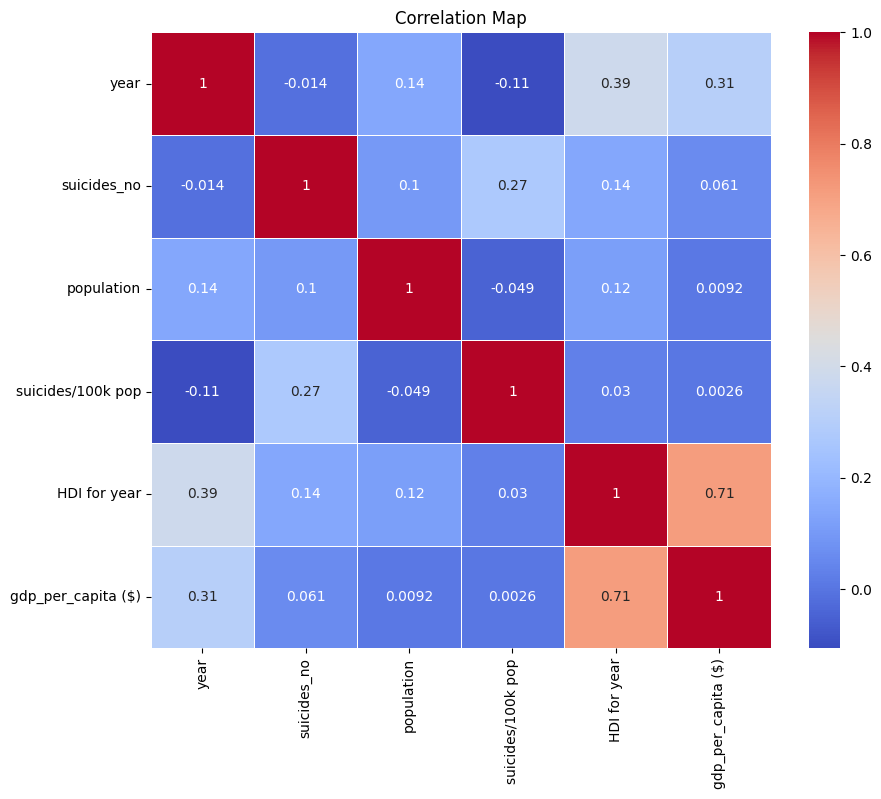

In [82]:
#A Heat map showing the correlation matrix

plt.figure(figsize =(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths= 0.5)
plt.title('Correlation Map')
plt.show()